In [6]:
try:
    get_ipython().run_line_magic("load_ext", "autoreload")
    get_ipython().run_line_magic("autoreload", "2")
except NameError:
    pass

import polars as pl
import numpy as np
from plotnine import ggplot, aes, geom_point
from plotnine import labs

from binscatter import binscatter

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
def make_data(n):
    x = np.random.normal(0, 1, n)
    y = 0.5 * x**2 + 0.3 * x + np.sin(x / .3) + np.random.normal(0, 0.5, n)
    return pl.DataFrame({"x_col": x, "y_col": y})

df = make_data(10000)

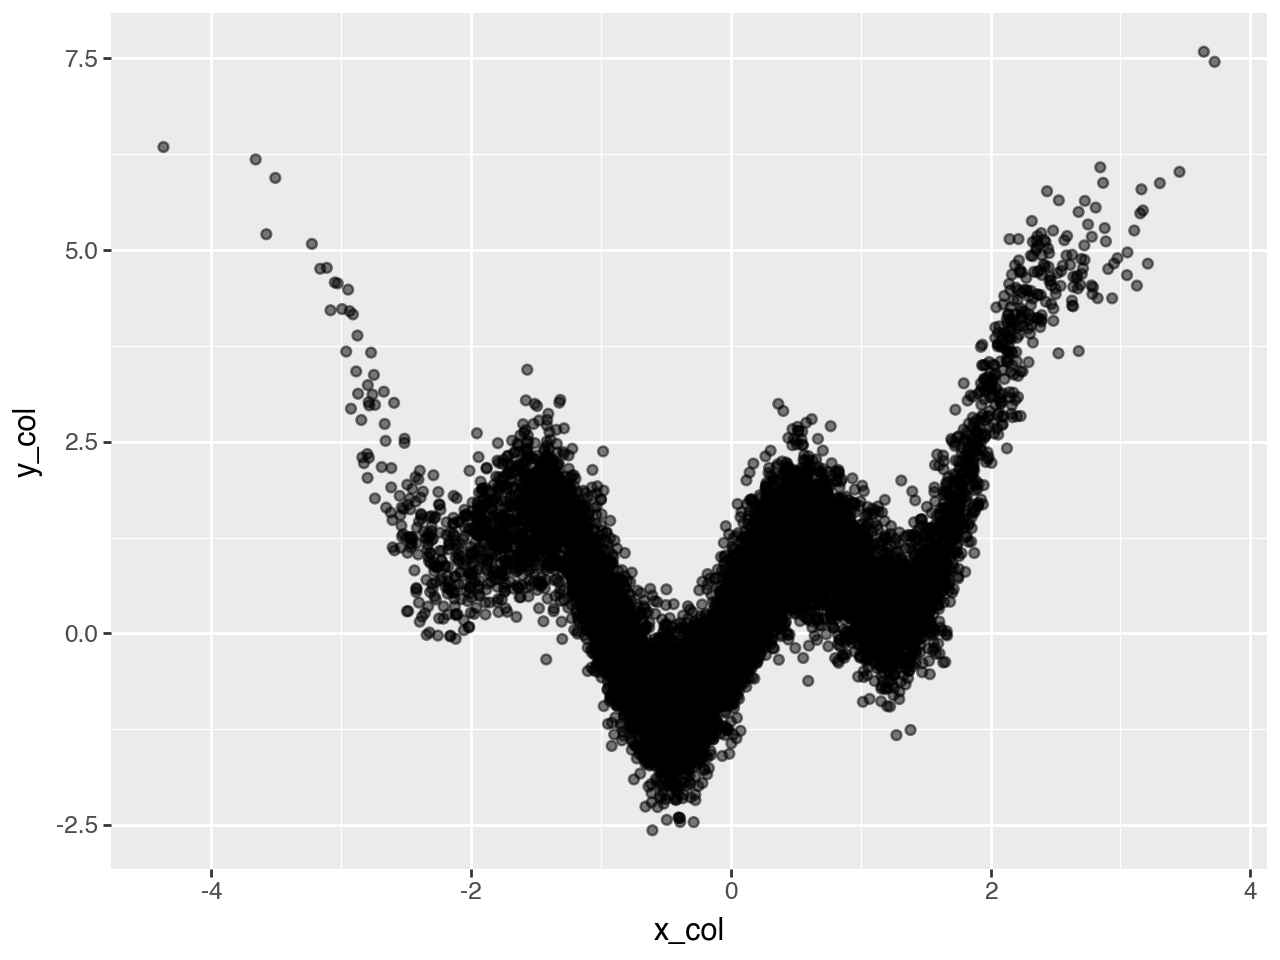

In [8]:
# Data
ggplot(df, aes("x_col", "y_col")) + geom_point(alpha=0.5)

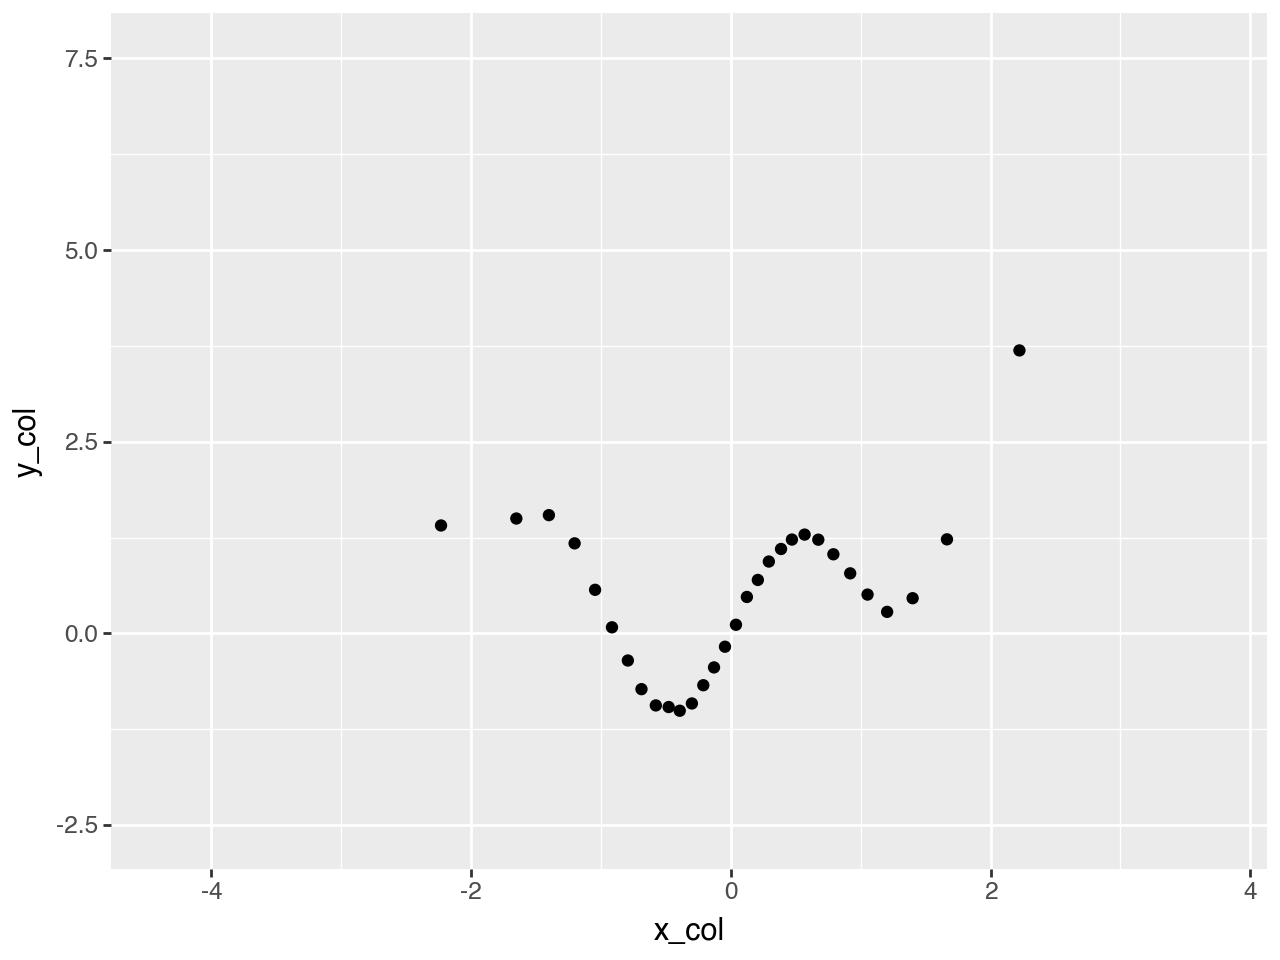

In [9]:
binscatter_plot = binscatter(df.select("y_col", "x_col"), 30)
binscatter_plot.show()

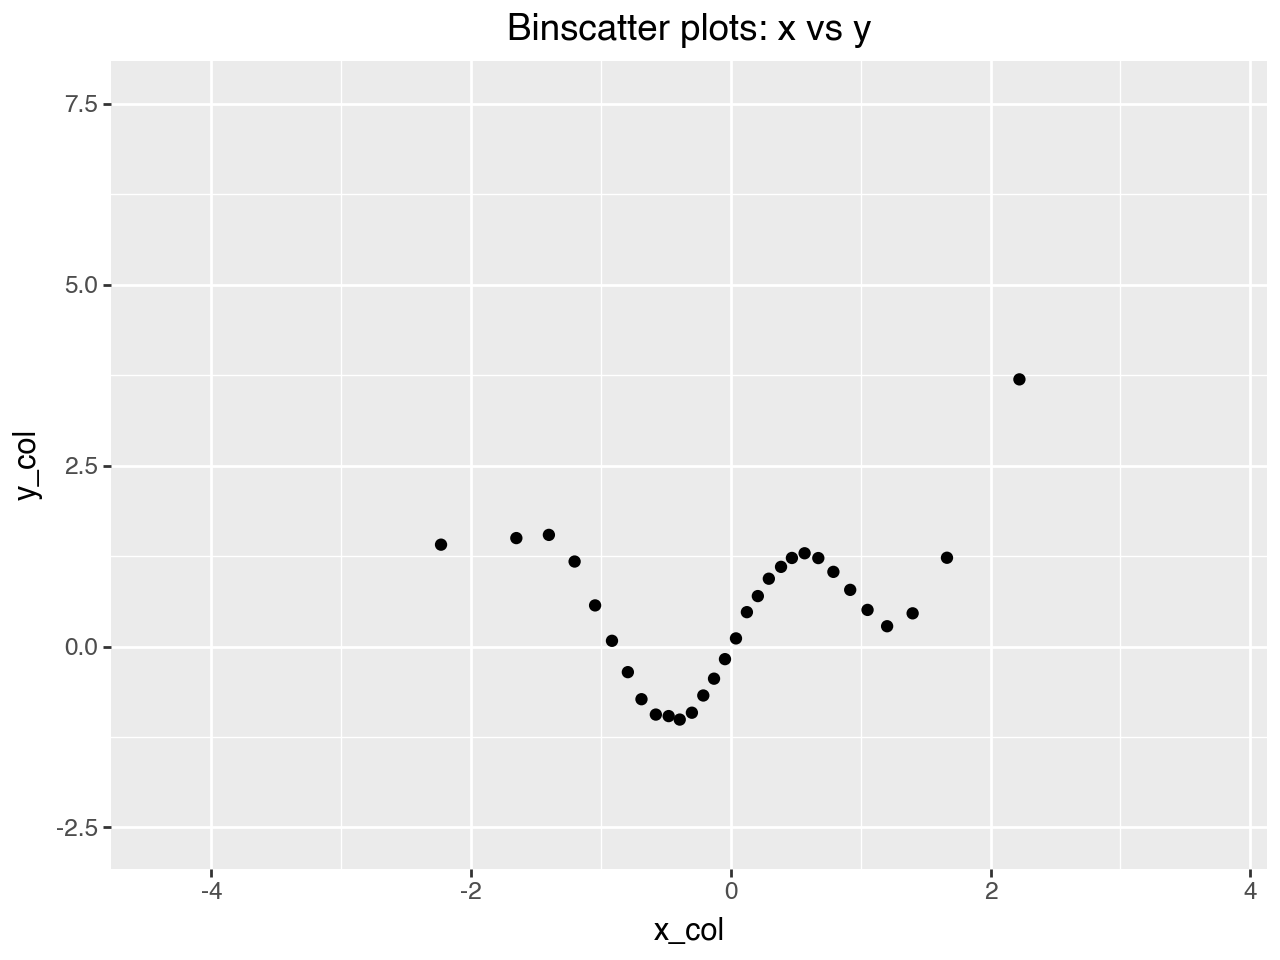

In [10]:
# This is a simple ggplot object so we add layers afters
binscatter_plot + labs(title="Binscatter plots: x vs y")